<a href="https://colab.research.google.com/github/AkshayWaghela/FCC/blob/notebooks/AW_fcc_book_recommendation_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [3]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2025-03-23 13:06:02--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M  83.3MB/s    in 0.3s    

2025-03-23 13:06:03 (83.3 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [4]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [5]:
# add your code here - consider creating a new cell for each section of code
df_books.describe(include='all')
df_books.isnull().sum()

,0
isbn,0
title,0
author,2


In [6]:
df_ratings.isnull().sum()

,0
user,0
isbn,0
rating,0


<Axes: xlabel='rating'>

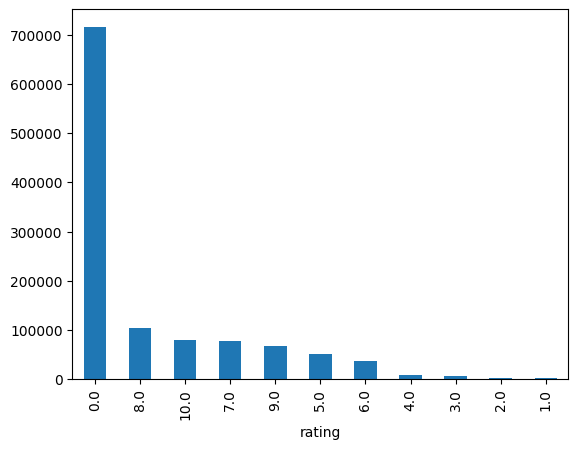

In [7]:
df_ratings['rating'].value_counts().plot(kind='bar')

In [8]:
df_ratings['user'].value_counts(  ).describe().round(2)

,count
count,105283.00
mean,10.92
std,90.56
min,1.00
25%,1.00
50%,1.00
75%,4.00
max,13602.00


In [9]:
userCount = df_ratings['user'].value_counts()
userCount.describe()

,count
count,105283.000000
mean,10.920851
std,90.562825
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,13602.000000


In [10]:
freqUser = userCount[userCount>200].index
len(freqUser)

899

In [11]:
df_ratings_user=df_ratings[df_ratings['user'].isin(freqUser)]
df_ratings_user

,user,isbn,rating
1456,277427,002542730X,10.0
1457,277427,0026217457,0.0
1458,277427,003008685X,8.0
1459,277427,0030615321,0.0
1460,277427,0060002050,0.0
...,...,...,...
1147612,275970,3829021860,0.0
1147613,275970,4770019572,0.0
1147614,275970,896086097,0.0
1147615,275970,9626340762,8.0


In [12]:
ratingCount = df_ratings['isbn'].value_counts()
ratingCount.describe()

,count
count,340556.000000
mean,3.376185
std,12.436252
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2502.000000


In [13]:
MostRated = ratingCount[ratingCount>100].index
len(MostRated)

721

In [14]:
len(df_ratings_user)

526356

In [15]:
df_ratings_rm=(df_ratings_user[df_ratings['isbn'].isin(MostRated)])
df_ratings_rm

<ipython-input-15-55e1e652e3e2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ratings_rm=(df_ratings_user[df_ratings['isbn'].isin(MostRated)])


,user,isbn,rating
1456,277427,002542730X,10.0
1469,277427,0060930535,0.0
1471,277427,0060934417,0.0
1474,277427,0061009059,9.0
1484,277427,0140067477,0.0
...,...,...,...
1147304,275970,0804111359,0.0
1147436,275970,140003065X,0.0
1147439,275970,1400031346,0.0
1147440,275970,1400031354,0.0


In [16]:
df = df_ratings_rm.pivot_table(index=['user'],columns=['isbn'],values='rating').fillna(0).T
df.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df.index = df.join(df_books.set_index('isbn'))['title']


In [18]:
df.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
Angels,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Boy Next Door,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Men Are from Mars, Women Are from Venus: A Practical Guide for Improving Communication and Getting What You Want in Your Relationships",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Divine Secrets of the Ya-Ya Sisterhood : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df.loc["The Queen of the Damned (Vampire Chronicles (Paperback))"].value_counts()


,count
The Queen of the Damned (Vampire Chronicles (Paperback)),
0.0,863
7.0,5
10.0,4
8.0,4
6.0,2
5.0,2
9.0,2


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


In [21]:
model = NearestNeighbors(metric='cosine')
model.fit(df.values)

NearestNeighbors(metric='cosine')

In [22]:
df.iloc[0].shape

title = 'The Queen of the Damned (Vampire Chronicles (Paperback))'
df.loc[title].shape

distance, indice = model.kneighbors([df.loc[title].values], n_neighbors=6)

print(distance)
print(indice)

df.iloc[indice[0]].index.values

pd.DataFrame({
    'title'   : df.iloc[indice[0]].index.values,
    'distance': distance[0]
}).sort_values(by='distance', ascending=False)


[[0.         0.51784116 0.5298544  0.73450685 0.7362787  0.7833433 ]]
[[134 124 150 125 149 156]]


,title,distance
5,Lasher: Lives of the Mayfair Witches (Lives of...,0.783343
4,The Witching Hour (Lives of the Mayfair Witches),0.736279
3,Interview with the Vampire,0.734507
2,The Tale of the Body Thief (Vampire Chronicles...,0.529854
1,"The Vampire Lestat (Vampire Chronicles, Book II)",0.517841
0,The Queen of the Damned (Vampire Chronicles (P...,0.000000


In [23]:
def get_recommends(title = ""):
  try:
    book = df.loc[title]
  except KeyError as e:
    print('The given book', e, 'does not exist')
    return

  distance, indice = model.kneighbors([book.values], n_neighbors=6)

  recommended_books = pd.DataFrame({
      'title'   : df.iloc[indice[0]].index.values,
      'distance': distance[0]
    }) \
    .sort_values(by='distance', ascending=False) \
    .head(5).values

  return [title, recommended_books]
get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")

['The Queen of the Damned (Vampire Chronicles (Paperback))',
 array([['Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches)',
         0.7833433151245117],
        ['The Witching Hour (Lives of the Mayfair Witches)',
         0.7362787127494812],
        ['Interview with the Vampire', 0.7345068454742432],
        ['The Tale of the Body Thief (Vampire Chronicles (Paperback))',
         0.529854416847229],
        ['The Vampire Lestat (Vampire Chronicles, Book II)',
         0.5178411602973938]], dtype=object)]

In [24]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", array([["I'll Be Seeing You", 0.8016210794448853],
       ['The Weight of Water', 0.7708583474159241],
       ['The Surgeon', 0.7699410915374756],
       ['I Know This Much Is True', 0.7677075266838074],
       ['The Lovely Bones: A Novel', 0.7230184078216553]], dtype=object)]
You passed the challenge! 🎉🎉🎉🎉🎉


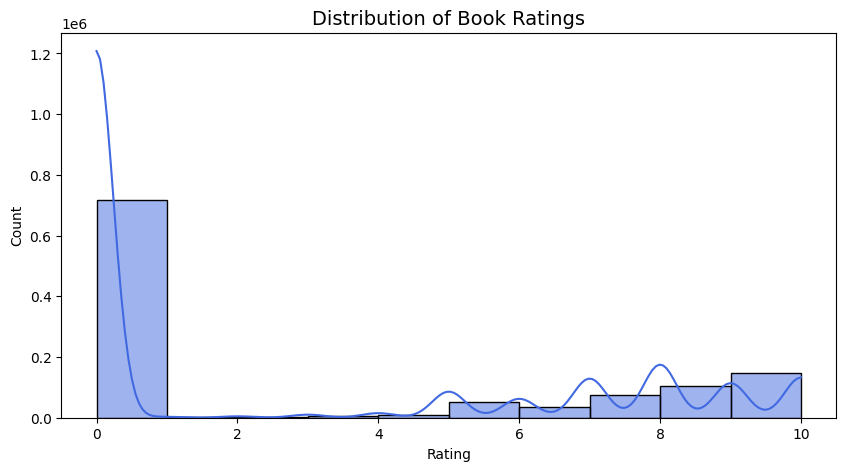

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df_ratings['rating'], bins=10, kde=True, color='royalblue')
plt.title("Distribution of Book Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [28]:
import plotly.graph_objects as go

def plot_negative_positive_similarity(title):
    # Get recommendations
    recommendations = get_recommends(title)
    if recommendations is None:
        return

    # Extract similar book titles and distances
    similar_books = recommendations[1][:, 0]  # Titles
    similar_distances = recommendations[1][:, 1].astype(float)  # Cosine distances
    similar_scores = 1 - similar_distances  # Convert distance to similarity

    # Get the least similar books (highest distances)
    all_books = df.index.values  # Get all book titles
    all_distances, all_indices = model.kneighbors([df.loc[title].values], n_neighbors=len(df))

    # Get the last 5 (most dissimilar) books
    dissimilar_books = df.iloc[all_indices[0][-5:]].index.values
    dissimilar_distances = all_distances[0][-5:].astype(float)
    dissimilar_scores = -(1 - dissimilar_distances)  # Negative similarity for visualization

    # Combine data
    book_titles = list(similar_books) + list(dissimilar_books)
    scores = list(similar_scores) + list(dissimilar_scores)
    categories = ['Similar'] * len(similar_books) + ['Dissimilar'] * len(dissimilar_books)

    # Create figure
    fig = go.Figure()

    # Add bars for similar books
    fig.add_trace(go.Bar(
        y=similar_books,
        x=similar_scores,
        orientation='h',
        name="Similar Books",
        marker=dict(color="green"),
        text=[f"{x:.2f}" for x in similar_scores],
        textposition="outside"
    ))

    # Add bars for dissimilar books (negative side)
    fig.add_trace(go.Bar(
        y=dissimilar_books,
        x=dissimilar_scores,
        orientation='h',
        name="Dissimilar Books",
        marker=dict(color="red"),
        text=[f"{x:.2f}" for x in dissimilar_scores],
        textposition="outside"
    ))

    # Update layout
    fig.update_layout(
        title=f"Most & Least Similar Books to '{title}'",
        xaxis=dict(title="Similarity Score (Negative = Dissimilar, Positive = Similar)", zeroline=True),
        yaxis=dict(title="Book Titles", autorange="reversed"),
        height=600,
        bargap=0.2
    )

    # Show the plot
    fig.show()

# Example: Plot with Negative & Positive Side Graph
plot_negative_positive_similarity("Where the Heart Is (Oprah's Book Club (Paperback))")
